In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/Admin/Documents/Datasets/Cars93.csv")
df.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [2]:
B = df[["Price", "MPG.highway", "EngineSize"]]
# B = B[B['Price']<15]  # if we want to visualize for only prices less than 15

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4) #right now 4 is decided randomly for explaination purpose
model = km.fit(B[["Price", "MPG.highway", "EngineSize"]])
B['cluster_label'] = model.labels_
B

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Price,MPG.highway,EngineSize,cluster_label
0,15.9,31,1.8,0
1,33.9,25,3.2,1
2,29.1,26,2.8,1
3,37.7,26,2.8,1
4,30.0,30,3.5,1
...,...,...,...,...
88,19.7,21,2.5,0
89,20.0,30,2.0,0
90,23.3,25,2.8,0
91,22.7,28,2.3,0


In [4]:
col = []
for i in B.cluster_label:
    if i == 0:
        col.append("red")
    elif i == 1:
        col.append("blue")
    elif i == 2:
        col.append("orange")
    else:
        col.append("black")
# col

Text(0, 0.5, 'mileage of car')

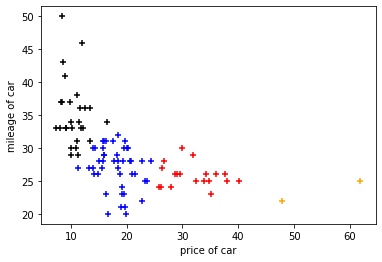

In [5]:
import matplotlib.pyplot as plt
plt.scatter(B.Price, B["MPG.highway"], c=col, marker='+')
# plt.scatter(model.cluster_centers_)
plt.xlabel("price of car")
plt.ylabel("mileage of car")

In [6]:
B.sort_values(by="cluster_label")

,Price,MPG.highway,EngineSize,cluster_label
92,26.7,28,2.4,0
21,29.5,26,3.3,0
77,28.7,26,2.1,0
57,31.9,29,2.3,0
56,32.5,25,1.3,0
...,...,...,...,...
23,11.3,29,2.2,3
53,11.6,36,1.8,3
41,12.1,46,1.5,3
78,11.1,38,1.9,3


In [7]:
B.cluster_label.value_counts()

1    45
3    27
0    19
2     2
Name: cluster_label, dtype: int64

In [8]:
model.cluster_centers_

array([[31.82105263, 25.78947368,  3.32105263],
       [18.08888889, 27.06666667,  2.91777778],
       [54.9       , 23.5       ,  3.85      ],
       [10.59259259, 35.18518519,  1.7037037 ]])

Text(0, 0.5, 'mileage of car')

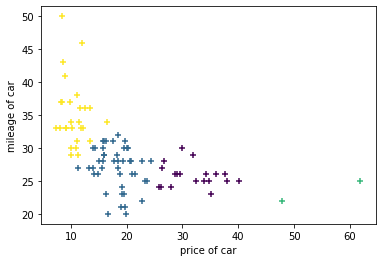

In [9]:
import matplotlib.pyplot as plt
plt.scatter(B.Price, B['MPG.highway'], c=model.labels_, marker='+')
plt.xlabel("price of car")
plt.ylabel("mileage of car")

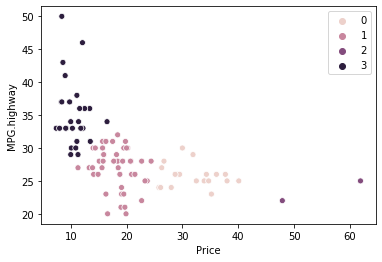

In [10]:
import seaborn as sb
sb.scatterplot(B.Price, B["MPG.highway"], hue=model.labels_)

In [13]:
# !pip install missingno --user
!pip install fancyimpute --user
# knn_impute(target=df['Age'], attributes=df.drop(['PassengerId']),
#     aggregation_method="mean", k_neighbors=10, numeric_distance='euclidean',
#     categorical_distance='hamming', missing_neighbors_threshold=0.8)



Processing c:\users\admin\appdata\local\pip\cache\wheels\c8\76\2f\b80a903a4dde1510d086aa6b1e7328fe8555cbcbc4350fc707\fancyimpute-0.5.4-py3-none-any.whl

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Admin\Anaconda3\python.exe' 'C:\Users\Admin\Anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' build_wheel 'C:\Users\Admin\AppData\Local\Temp\tmpn1pfj9nr'
       cwd: C:\Users\Admin\AppData\Local\Temp\pip-install-jyshp1j0\cvxpy\
  Complete output (413 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\cvxpy
  copying cvxpy\error.py -> build\lib.win-amd64-3.7\cvxpy
  copying cvxpy\settings.py -> build\lib.win-amd64-3.7\cvxpy
  copying cvxpy\__init__.py -> build\lib.win-amd64-3.7\cvxpy
  creating build\lib.win-amd64-3.7\examples
  copying examples\admm_example.py -> build\lib.win-amd64-3.7\examples
  copying examples\admm_lasso.py -> build\lib.win-amd64-3.7\examples
  copying examples\admm_svm_pool.py -> build\lib.win-amd64-3.7\examples
  copying examples\admm_svm_procs.py -> build\lib.win-amd64-3.7\example


  Using cached cvxpy-1.0.31.tar.gz (947 kB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Processing c:\users\admin\appdata\local\pip\cache\wheels\72\21\a8\a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0\knnimpute-0.1.0-py3-none-any.whl
  Using cached scs-2.1.2.tar.gz (3.5 MB)
  Using cached ecos-2.0.7.post1.tar.gz (126 kB)
  Using cached osqp-0.6.1-cp37-cp37m-win_amd64.whl (156 kB)
Processing c:\users\admin\appdata\local\pip\cache\wheels\83\2b\b4\50d7cae5b9069434454fd36da009832592af4fff58b51db8d9\multiprocess-0.70.9-py3-none-any.whl
Processing c:\users\admin\appdata\local\pip\cache\wheels\56\b0\fe\4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0\future-0.18.2-py3-none-

  copying cvxpy\atoms\lambda_sum_smallest.py -> build\lib.win-amd64-3.7\cvxpy\atoms
  copying cvxpy\atoms\length.py -> build\lib.win-amd64-3.7\cvxpy\atoms
  copying cvxpy\atoms\log_det.py -> build\lib.win-amd64-3.7\cvxpy\atoms
  copying cvxpy\atoms\log_sum_exp.py -> build\lib.win-amd64-3.7\cvxpy\atoms
  copying cvxpy\atoms\matrix_frac.py -> build\lib.win-amd64-3.7\cvxpy\atoms
  copying cvxpy\atoms\max.py -> build\lib.win-amd64-3.7\cvxpy\atoms
  copying cvxpy\atoms\min.py -> build\lib.win-amd64-3.7\cvxpy\atoms
  copying cvxpy\atoms\mixed_norm.py -> build\lib.win-amd64-3.7\cvxpy\atoms
  copying cvxpy\atoms\norm.py -> build\lib.win-amd64-3.7\cvxpy\atoms
  copying cvxpy\atoms\norm1.py -> build\lib.win-amd64-3.7\cvxpy\atoms
  copying cvxpy\atoms\norm_inf.py -> build\lib.win-amd64-3.7\cvxpy\atoms
  copying cvxpy\atoms\norm_nuc.py -> build\lib.win-amd64-3.7\cvxpy\atoms
  copying cvxpy\atoms\one_minus_pos.py -> build\lib.win-amd64-3.7\cvxpy\atoms
  copying cvxpy\atoms\pf_eigenvalue.py -> build

  Running setup.py clean for scs
  Running setup.py clean for ecos
Failed to build cvxpy scs ecos
